## Example rotational/vibrational widget 

PKH

- Install anaconda/python2.7 [https://www.anaconda.com/download/#macos]
- Use jupyter notebook


In [1]:
# Function for integreating ODE and displaying results
import scipy 
from scipy.integrate import odeint
import numpy as np
import matplotlib.pylab as plt
import math as math
from ipywidgets import widgets, fixed, Layout
%matplotlib inline

Embeds widget into notebook 

In [2]:
%%html
<style type='text/css'>
.widget-inline-hbox .widget-label {
      max-width: 250px;
      min-width: 250px;
}
</style>

### Really basic function for generating something resembling a rotational/vibrational spectrum

- doesn't include hack for lengthening bond
- need to debug slightly, since the exp. decay is off. 

In [3]:
# a function to display plot 

def disp(m=6.86e-3,  # mu for CO [kg/mol]
         r=1.13e-10, # r for CO [m]
         nu=6.445e13,  # For CO [1/s],from [2150 1/cm]
         T=300.  # [K]
        ):
    nJs=20
    
    I = m*r**2
    R = 8.314  # [J/molK]
    RT = R * T
    #print RT
    #print "I",I
    
    
    #return 
    ar,hbar2I = branch(nJs,I=I,nu=nu,RT=RT,branchName="P")
    w = (ar[0,0]-ar[1,0])/4. # make w smaller than peak spacing
    #print w
    #print ar
    fig, ax = plt.subplots()
    ax.bar(ar[:,0],ar[:,1],width=w)
    ar,hbar2I = branch(nJs,I=I,nu=nu,RT=RT,branchName="R")
    #print ar
    ax.bar(ar[:,0],ar[:,1],width=w)
    #ax.set_xlim([290,310])
    textstr="hbar^2/I=%e [kJ/mol]"%(hbar2I/1e3)
    #textstr="1"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    ax.text(0.05, 0.15, textstr, transform=ax.transAxes,bbox=props, fontsize=14,
        verticalalignment='top')
    ax.set_xlabel("[kJ/mol]")
    ax.set_ylabel("Intensity")
    for tick in ax.get_xticklabels():
      tick.set_rotation(45)

In [4]:
h=6.626e-34 # [Js]
Na = 6.022e23 # [#/mol]
hbar = h/(2*np.pi)
T = 300.
RT = 8.314 *T # [J/molK * K]
m=6.86e-3,  # mu for CO [kg/mol]
r=1.13e-10, # r for CO [m]
         


def branch(nJs=90,
           I=1,
           nu=76.8e12,#  HBr [1/s]
           RT=RT, # RT at 300K
           branchName="R"):
    #print kT
    Js=np.arange(nJs)
    Juppers = Js[1::]
    Jis = Js[:-1]
    
    # checking hbar^2/I [J/mol]
    hbar2_I = hbar**2/I*(Na**2)
    #print "Er = hbar^2/I [J/mol]",hbar2_I # validated for CO (s.b. 0.046 kJ/mol)
    
    #Ers = hbar/I * Juppers*Na
    Ers = hbar2_I*Juppers
    print "Er0 [J/mol]",Ers[0], "Er0/RT []", Ers[0]/RT
    Ev = h*nu*Na
    print "Ev= hv [J/mol], Ev/RT []",Ev, Ev/RT
    
    # determines degeneracy
    gs = 2*Jis+1
    #print "gs",gs
    #gs = 1
    f = 20. # I'm missing a factor somewhere. Need to fix 
    boltz = gs * np.exp(-f*Ers/RT)
    #gs = 1
    #boltz = gs * np.exp(-Ers/RT)

    #print Jis
    #print Ers,-Ers/kT,boltz
    #print np.exp(-Ers/kT)
    #boltz[:]=1
    if branchName is "P":
        Es = Ev - Ers
        #print "e"
    else:
        Es= Ev + Ers
    #print "Es",Es/(RT)
    
    # J->kJ
    Es_kJ = Es/1e3
    
    # store data 
    ar = np.zeros([nJs-1,2])
    ar[:,0] = Es_kJ
    norm = 1
    ar[:,1] = boltz/norm
    hbar2I = Ers[0]
    #print hbar2I
    return ar, hbar2I

Default values

Er0 [J/mol] 46.0408810764 Er0/RT [] 0.0184591777229
Ev= hv [J/mol], Ev/RT [] 25716.692054 10.3105974076
Er0 [J/mol] 46.0408810764 Er0/RT [] 0.0184591777229
Ev= hv [J/mol], Ev/RT [] 25716.692054 10.3105974076


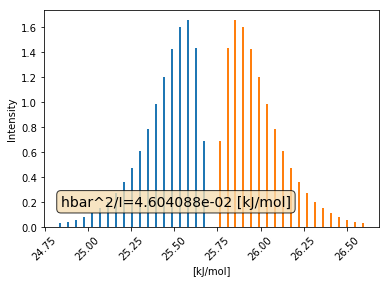

In [5]:
disp()

Using case with higher mass

Er0 [J/mol] 46.0408810764 Er0/RT [] 0.0110755066337
Ev= hv [J/mol], Ev/RT [] 25716.692054 6.18635844455
Er0 [J/mol] 46.0408810764 Er0/RT [] 0.0110755066337
Ev= hv [J/mol], Ev/RT [] 25716.692054 6.18635844455


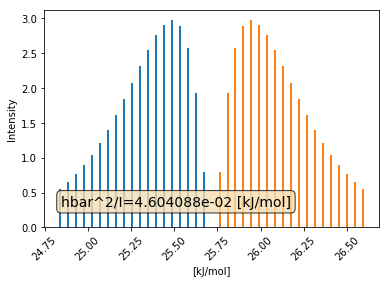

In [6]:
plt.figure()
disp(T=500)

widget-o-fun

Er0 [J/mol] 46.0408810764 Er0/RT [] 0.0184591777229
Ev= hv [J/mol], Ev/RT [] 25716.692054 10.3105974076
Er0 [J/mol] 46.0408810764 Er0/RT [] 0.0184591777229
Ev= hv [J/mol], Ev/RT [] 25716.692054 10.3105974076


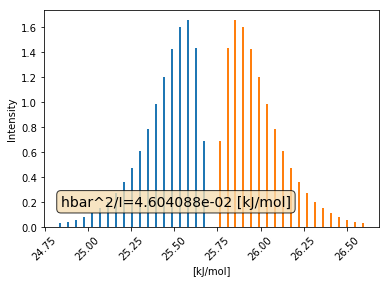

In [7]:
m0=6.86e-3*1e3  # mu for CO [kg/mol]->[g/mol]
r0=1.13e-10*1e10 # r for CO [m]->Ang
T0= 300. # [K]       
nu0 = 6.445e13*1e-12  # for CO [1/s]->Thz, from [2150 1/cm]

def dispUnits(m,r,T,nu):
    disp(
        m=m*1e-3,
        r=r*1e-10,
        T=T,
        nu=nu*1e12)

slider = widgets.interact(dispUnits, isadaptive=fixed(True),
            m=widgets.FloatSlider(min=m0,max=m0*10,step=0.1*m0,value=m0,description='m [g/mol]',layout=Layout(width='70%'), continuous_update = True),
            r=widgets.FloatSlider(min=r0,max=r0*5,step=0.1*r0,value=r0,description='r [A]',layout=Layout(width='70%'), continuous_update = True),
            T=widgets.FloatSlider(min=T0,max=T0*4,step=0.1*T0,value=T0,description='T [K]',layout=Layout(width='70%'), continuous_update = True), 
            nu=widgets.FloatSlider(min=nu0,max=nu0*3,step=0.1*nu0,value=nu0,description='nu [THz]',layout=Layout(width='70%'), continuous_update = True) 
            )